In [1]:
# Copyright 2022 - Olman Ureña
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/olmaneuh/olmaneuh-expo/tree/main/playing-with-machine-learning-in-the-cloud/machine_learning_apis_demo.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo"> Run In Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/github/olmaneuh/olmaneuh-expo/tree/main/playing-with-machine-learning-in-the-cloud/machine_learning_apis_demo.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      View On GitHub
    </a>
  </td>
</table>

# **Machine Learning APIs - Demo**

# **1. Problem Overview**

Detects faces within an image.

# **2. Solution: Cloud Vision API**
The [Google Cloud Vision API](https://cloud.google.com/vision/docs/) allows developers to easily integrate vision detection features within applications, including image labeling, face and landmark detection, optical character recognition (OCR), and tagging of explicit content.

# **3. Setup And Requirements**
* Sign in to Cloud Console and create a new project _([How to create a Google Cloud project](https://developers.google.com/workspace/guides/create-project))_.
* Enable billing in Cloud Console in order to use Google Cloud resources _([New users of Google Cloud are eligible for the $300USD Free Trial program](https://cloud.google.com/free/docs/free-cloud-features))_.

> **Important:**
>
> Running through this Notebook shouldn't cost anything at all. Be sure to follow any instructions in the _"Cleaning Up"_ section which advises you how to shut down resources so you don't incur billing.

# **4. Enable Vision API**
Before you can begin using Cloud Vision API, you must enable it. 
Open the Cloud Shell and type `gcloud services enable vision.googleapis.com` to enable it, you can enable it using the Cloud Console if you prefer.

# **5. Authorize API requests**
As a best practice, Google Cloud recommends the use of service account authorization when calling APIs.

1. [Create a service account for this Notebook](https://cloud.google.com/iam/docs/creating-managing-service-accounts#iam-service-accounts-create-console).
2. [Create a service account key](https://cloud.google.com/iam/docs/creating-managing-service-account-keys#iam-service-account-keys-create-console).

# **6. Setup An Environment Variable**
The environment variable `GOOGLE_APPLICATION_CREDENTIALS` has the default service account private key that will be used. 

The environment variable should be set to the **full path** of the credentials JSON file you saved.


In [2]:
from google.colab import files
import os

# upload files to Colab
uploaded = files.upload()

for file_name in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=file_name, length=len(uploaded[file_name])))
  
  # create an environment variable
  os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = file_name
  print("Service Account Key: {}".format(
      os.environ["GOOGLE_APPLICATION_CREDENTIALS"]))
  

Saving playing-with-ml-in-the-cloud-key.json to playing-with-ml-in-the-cloud-key.json
User uploaded file "playing-with-ml-in-the-cloud-key.json" with length 2361 bytes
Service Account Key: playing-with-ml-in-the-cloud-key.json


# **7. Install The Cloud Vision Client Library For Python**

In [3]:
!pip3 install --upgrade google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **8. Upload The Images**

Saving face-sample-1.jpg to face-sample-1.jpg
Saving face-sample-2.jpg to face-sample-2.jpg
Saving face-sample-3.jpg to face-sample-3.jpg


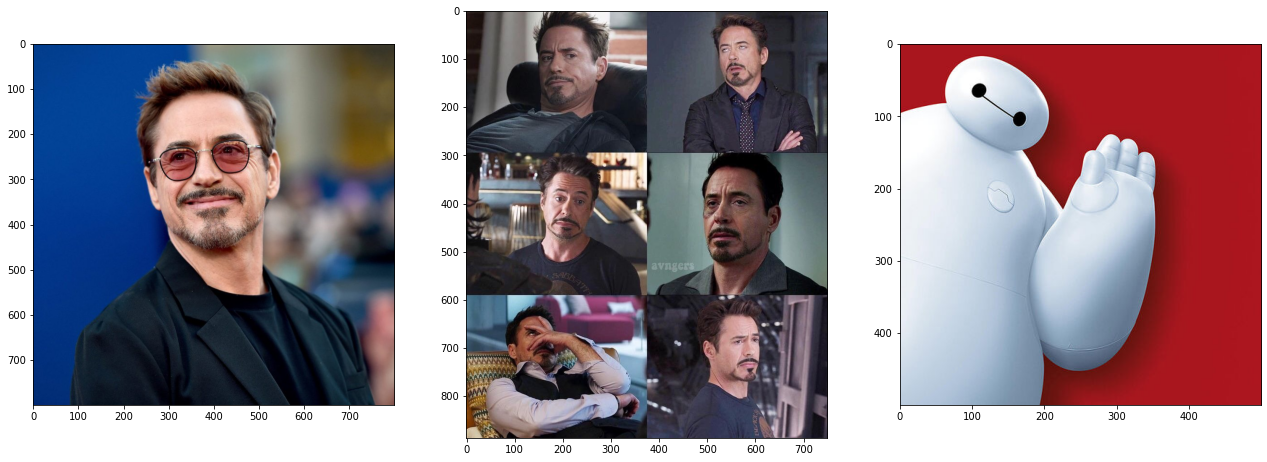

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files

uploaded_imgs = []
uploaded = files.upload()

for file_name in uploaded.keys():
  uploaded_imgs.append(file_name)

# displaying uploaded images
plt.figure(figsize=(22, 22))
for i, img in enumerate(uploaded_imgs):
  img_to_display = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
  ax = plt.subplot(1, 3, i+1)
  plt.imshow(img_to_display)

# **9. Define Some Methods And Use The API**

In [5]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.cloud import vision


def detect_faces(path):
    """Detects faces in an image."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations
    
    img_to_display = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

    for face in faces:
        vertices = [[vertex.x, vertex.y]
                    for vertex in face.bounding_poly.vertices]
        vertices = np.array(vertices, dtype=np.int32).reshape((-1,1,2))

        img_to_display = cv2.polylines(img_to_display, 
                                       [vertices],
                                       isClosed=True,
                                       color=(50,205,50),
                                       thickness=5)
    plt.imshow(img_to_display)

# **10. Execute Some Tests**

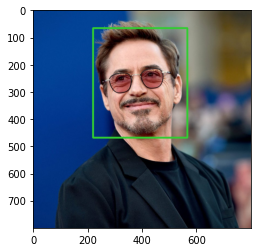

In [6]:
detect_faces(uploaded_imgs[0])

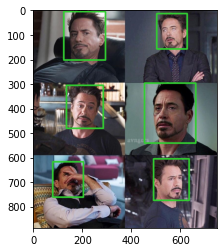

In [7]:
detect_faces(uploaded_imgs[1])

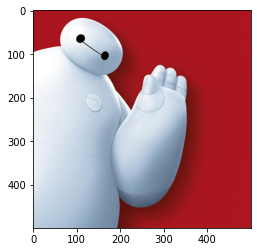

In [8]:
detect_faces(uploaded_imgs[2])

# **11. Cleaning Up**
To clean up all resources used in this Notebook, you can [delete the Google Cloud project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#shutting_down_projects) you used for the tutorial.